# Challenge Set 8
## Hasan Haq

**Challenge 1**

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_house = pd.read_csv('data/house-votes-84.data', header=None)

In [6]:
df_house.replace({'y':1, 'n':0, '?':np.nan}, inplace=True)
df_house.fillna(df_house.mode().iloc[0], inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
vy = df_house.iloc[:,0]
vX = df_house.iloc[:,1:]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(vX, vy, test_size=.30, random_state=4444)

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
ypred = logreg.predict(X_test)
ylog_score = logreg.fit(X_train, y_train).decision_function(X_test)

In [64]:
print(accuracy_score(y_test, ypred))
print(precision_score(y_test, ypred, pos_label='republican'))
print(recall_score(y_test, ypred, pos_label='republican'))
print(f1_score(y_test, ypred, pos_label='republican'))

0.93893129771
0.96
0.888888888889
0.923076923077


**Challenge 2**

For each, draw the ROC curve and calculate the AUC.

In [65]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, ylog_score, pos_label='republican')
auc_lr = auc(fpr_lr,tpr_lr)

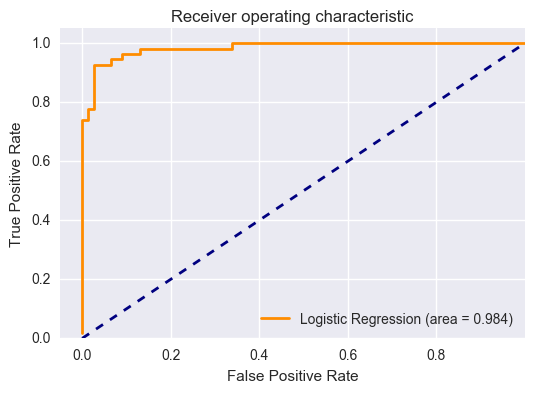

In [67]:
plt.plot(fpr_lr, tpr_lr, color='darkorange',
         lw=2, label='Logistic Regression (area = %0.3f)' % auc_lr)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc=4);

**Challenge 3**

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [80]:
vy_pos = [1 if x == 'republican' else 0 for x in vy]

In [82]:
cross_val_score(logreg, vX, vy_pos, scoring='accuracy', cv=10)

array([ 0.97727273,  0.93181818,  0.97727273,  0.93181818,  1.        ,
        0.93181818,  1.        ,  0.97674419,  0.85714286,  0.97619048])

In [84]:
cross_val_score(logreg, vX, vy_pos, scoring='precision', cv=10)

array([ 0.94444444,  0.88888889,  1.        ,  0.88888889,  1.        ,
        1.        ,  1.        ,  0.94444444,  0.77777778,  0.94117647])

In [86]:
cross_val_score(logreg, vX, vy_pos, scoring='recall', cv=10)

array([ 1.        ,  0.94117647,  0.94117647,  0.94117647,  1.        ,
        0.82352941,  1.        ,  1.        ,  0.875     ,  1.        ])

In [87]:
cross_val_score(logreg, vX, vy_pos, scoring='f1', cv=10)

array([ 0.97142857,  0.91428571,  0.96969697,  0.91428571,  1.        ,
        0.90322581,  1.        ,  0.97142857,  0.82352941,  0.96969697])

**Challenge 4**

For your movie classifiers, calculate the precision and recall for each class.

In [88]:
mv = pd.read_csv('data/2013_movies.csv')

In [89]:
model_mv = mv[['Rating','Budget','DomesticTotalGross','Runtime']].dropna()

In [97]:
x_mv = model_mv[['Budget','DomesticTotalGross','Runtime']]
y_mv = model_mv['Rating']

In [105]:
np.unique(y_mv)

array(['PG-13', 'R'], dtype=object)

In [98]:
Xmv_train, Xmv_test, ymv_train, ymv_test = train_test_split(x_mv, y_mv, test_size=.30, random_state=4444)

In [100]:
logreg_mv = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg_mv.fit(Xmv_train, ymv_train)
ymv_pred = logreg.predict(Xmv_test)

In [101]:
ymv_score = logreg_mv.fit(Xmv_train, ymv_train).decision_function(Xmv_test)

In [107]:
print(accuracy_score(ymv_test, ymv_pred))
print(precision_score(ymv_test, ymv_pred, pos_label='PG-13'))
print(recall_score(ymv_test, ymv_pred, pos_label='PG-13'))
print(f1_score(ymv_test, ymv_pred, pos_label='PG-13'))

0.407407407407
0.318181818182
0.407407407407
0.357142857143


**Challenge 5**

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [108]:
hab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [109]:
hab.columns = ['age','yr','nodes','survived5']

In [113]:
yhab = hab['survived5']
Xhab = hab[['age','yr','nodes']]

In [114]:
Xhab_train, Xhab_test, yhab_train, yhab_test = train_test_split(Xhab, yhab, test_size=.30, random_state=4444)

In [115]:
logreg_hab = LogisticRegression()
logreg_hab.fit(Xhab_train, yhab_train)
ypred_hab = logreg_hab.predict(Xhab_test)
yhab_score = logreg_hab.fit(Xhab_train, yhab_train).decision_function(Xhab_test)

In [118]:
fpr_hab, tpr_hab, _ = roc_curve(yhab_test, yhab_score, pos_label=2)
auc_hab = auc(fpr_hab,tpr_hab)

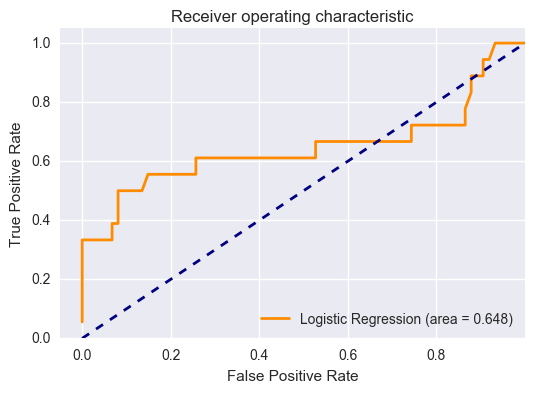

In [119]:
plt.plot(fpr_hab, tpr_hab, color='darkorange',
         lw=2, label='Logistic Regression (area = %0.3f)' % auc_hab)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc=4);